In [23]:
import os 
import pandas as pd
import numpy as np
import subprocess
import sys
import shutil
from distutils.dir_util import copy_tree
import distutils
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import timeit

In [29]:
def WMS_Max_Flood_File_to_ASCii(gfl_file, NumRowsCells, NumCols_Cells,
                           cellsize, xll, yll, no_data_val, Save_filename, Save_FilePlace, 
                                PLOT=True, SAVE=False):
    
    NumCELLS = NumRowsCells* NumCols_Cells

    arr = np.genfromtxt(gfl_file, skip_header=8, delimiter=',')    # delimit with a comma to keep it from using spaces...
    arr = arr[:-1]   # Cut off the last row which says ENDDS
    arr_activecells = arr[0:NumCELLS]
    arr_datacells   =  arr[NumCELLS:]

    gridmo = np.reshape(arr_datacells, (NumRowsCells, NumCols_Cells))
    
    if PLOT: 
        # plot it in python 
        fig, ax = plt.subplots(figsize=(8, 3))
        plt.imshow(gridmo, cmap='gray')      # Plot the data using imshow with gray colormap

    if SAVE:    
        # Save the ASCii File 
        headerstring       = bytes('ncols %d\nnrows %d\nxllcorner %f\nyllcorner %f\ncellsize %f\nNODATA_value %f\n' % 
            (gridmo.shape[1], gridmo.shape[0], xll, yll, cellsize, no_data_val), 'UTF-8')
        with open(os.path.join(Save_FilePlace, "{}.asc".format(Save_filename)),'wb') as fout:
            fout.write(headerstring)
            np.savetxt(fout,gridmo,'%5.2f')

        # Save the projection file for ArcGIS (Projection might need to be changed depending on WMS projection?) 
        epsg = 'PROJCS["NAD_1983_HARN_UTM_Zone_4N",GEOGCS["GCS_North_American_1983_HARN",DATUM["D_North_American_1983_HARN",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",-159.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]],VERTCS["Local",VDATUM["Local"],PARAMETER["Direction",1.0],UNIT["Meter",1.0]]'
        with open(os.path.join(Save_FilePlace, "{}.prj".format(Save_filename)), "w") as prj:
            prj.write(epsg)
            prj.close()

        print("Saved {}.asc at {}".format(Save_filename, Save_FilePlace))
    
    return gridmo
        


gfl_file = the name and location of the .gfl max flood depth file 

NumRowsCells =  The number of rows of cells in the model, i.e. N-S dimension length 

NumCols_Cells = The number of Columns of cells in the model i.e. E-W dimension length 

cellsize = The size of cells (in m) for the ASCII grid

xll The Easting UTM coordinate of the Lower Left cell of the model domain, 

yll The Northing UTM coordinate of the Lower Left cell of the model domain, 
note that the ASC is based on the center of the Lower Left cell, whereas its easiest to see the corner, so some math needs to be done 

no_data_val = put in whatever here

Save_filename = the filename to which the .asc will be saved

Save_FilePlace = The place to save the asc raster 

PLOT = True and it will plot in the notebook

SAVE = True and it will save the asc file, false it wont


# FLOOD MAPS FOR 40m GRID

In [53]:
gfl_file = '18_SLR_MHHW_40m.gfl'
Save_filename = '18_SLR_MHHW_40m'
Save_FilePlace = 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\WMS_python\\create_ASC_files'

In [54]:
NumRowsCells = 232
NumCols_Cells = 195
cellsize = 40.000000
xll = 445134.300000
yll = 2447505.460000
no_data_val = -9999
PLOT = True
SAVE = True

Saved 18_SLR_MHHW_40m.asc at C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\create_ASC_files


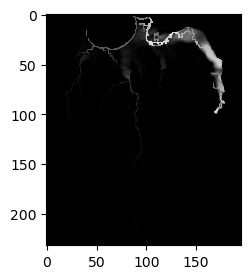

In [55]:
x = WMS_Max_Flood_File_to_ASCii(gfl_file, NumRowsCells, NumCols_Cells,
                           cellsize, xll, yll, no_data_val, Save_filename, Save_FilePlace, 
                                PLOT, SAVE)

# FLOOD MAPS FOR 10m GRID

In [41]:
gfl_file = '6_MHHW_10m.gfl'
Save_filename = '6ft_10m_Current_test2'
Save_FilePlace = 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\WMS_python\\create_ASC_files'

In [42]:
NumRowsCells = 551
NumCols_Cells = 264
cellsize = 10.000000
xll = 446231.800000
yll = 2454109.400000
no_data_val = -9999
PLOT = True
SAVE = True

Saved 6ft_10m_Current_test2.asc at C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\create_ASC_files


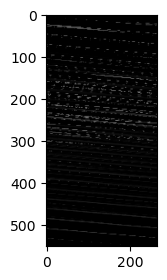

In [43]:
x = WMS_Max_Flood_File_to_ASCii(gfl_file, NumRowsCells, NumCols_Cells,
                           cellsize, xll, yll, no_data_val, Save_filename, Save_FilePlace, 
                                PLOT, SAVE)